In [91]:
import cv2
import mediapipe as mp
from matplotlib import pyplot as plt
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

face_landmarks: landmark {
  x: 0.39322027564048767
  y: 0.660411536693573
  z: -0.07286673784255981
}
landmark {
  x: 0.3677496314048767
  y: 0.5895174741744995
  z: -0.12592528760433197
}
landmark {
  x: 0.3839889168739319
  y: 0.61078280210495
  z: -0.0700656920671463
}
landmark {
  x: 0.3507829010486603
  y: 0.5247548222541809
  z: -0.08333061635494232
}
landmark {
  x: 0.3634944558143616
  y: 0.5680716037750244
  z: -0.13236628472805023
}
landmark {
  x: 0.36421775817871094
  y: 0.5412594676017761
  z: -0.12114018946886063
}
landmark {
  x: 0.3713274598121643
  y: 0.47653427720069885
  z: -0.05386897549033165
}
landmark {
  x: 0.24071601033210754
  y: 0.4890934228897095
  z: 0.08752581477165222
}
landmark {
  x: 0.3688989579677582
  y: 0.4289979934692383
  z: -0.034382887184619904
}
landmark {
  x: 0.36391210556030273
  y: 0.4024415612220764
  z: -0.03622051700949669
}
landmark {
  x: 0.35451361536979675
  y: 0.29965740442276
  z: -0.0008639352745376527
}
landmark {
  x: 0.3951123

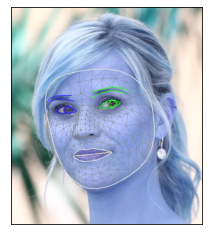

In [92]:

# For static images:
IMAGE_FILES = ["images/heart.jpg"]
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5) as face_mesh:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    # Convert the BGR image to RGB before processing.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print and draw face mesh landmarks on the image.
    if not results.multi_face_landmarks:
      continue
    annotated_image = image.copy()
    for face_landmarks in results.multi_face_landmarks:
      print("face_landmarks:", face_landmarks)
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_TESSELATION,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_tesselation_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_CONTOURS,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_contours_style())
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles
          .get_default_face_mesh_iris_connections_style())
    cv2.imwrite("/images/annotated_image" + str(idx) + ".png", annotated_image)
    img = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2GRAY)
    # plt.imshow(img)
    plt.imshow(annotated_image)
    plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
    plt.show()

In [93]:
# For webcam input:
# drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)
# cap = cv2.VideoCapture(0)
# with mp_face_mesh.FaceMesh(
#     max_num_faces=1,
#     refine_landmarks=True,
#     min_detection_confidence=0.5,
#     min_tracking_confidence=0.5) as face_mesh:
#   while cap.isOpened():
#     success, image = cap.read()
#     if not success:
#       print("Ignoring empty camera frame.")
#       # If loading a video, use "break" instead of "continue".
#       continue
#
#     # To improve performance, optionally mark the image as not writeable to
#     # pass by reference.
#     image.flags.writeable = False
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#     results = face_mesh.process(image)
#
#     # Draw the face mesh annotations on the image.
#     image.flags.writeable = True
#     image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
#     if results.multi_face_landmarks:
#       for face_landmarks in results.multi_face_landmarks:
#         mp_drawing.draw_landmarks(
#             image=image,
#             landmark_list=face_landmarks,
#             connections=mp_face_mesh.FACEMESH_TESSELATION,
#             landmark_drawing_spec=None,
#             connection_drawing_spec=mp_drawing_styles
#             .get_default_face_mesh_tesselation_style())
#         mp_drawing.draw_landmarks(
#             image=image,
#             landmark_list=face_landmarks,
#             connections=mp_face_mesh.FACEMESH_CONTOURS,
#             landmark_drawing_spec=None,
#             connection_drawing_spec=mp_drawing_styles
#             .get_default_face_mesh_contours_style())
#         mp_drawing.draw_landmarks(
#             image=image,
#             landmark_list=face_landmarks,
#             connections=mp_face_mesh.FACEMESH_IRISES,
#             landmark_drawing_spec=None,
#             connection_drawing_spec=mp_drawing_styles
#             .get_default_face_mesh_iris_connections_style())
#     # Flip the image horizontally for a selfie-view display.
#     cv2.imshow("MediaPipe Face Mesh", cv2.flip(image, 1))
#     if cv2.waitKey(5) & 0xFF == 27:
#       break
# cap.release()

In [94]:
MESH_ANNOTATIONS = {
  "silhouetteForehead": [
    10, 338, 297, 332, 284, 251, 21,  54,  103, 67, 109
  ],

  "silhouetteCheekbones": [
    389, 356, 454, 323, 93, 234, 127, 162
  ],

  "silhouetteJaw": [
    361, 288, 397, 365, 379, 378, 400, 377, 152, 148, 176, 149, 150, 136, 172, 58, 132
  ],

  "lipsUpperOuter": [61, 185, 40, 39, 37, 0, 267, 269, 270, 409, 291],
  "lipsLowerOuter": [146, 91, 181, 84, 17, 314, 405, 321, 375, 291],
  "lipsUpperInner": [78, 191, 80, 81, 82, 13, 312, 311, 310, 415, 308],
  "lipsLowerInner": [78, 95, 88, 178, 87, 14, 317, 402, 318, 324, 308],

  "rightEyeUpper0": [246, 161, 160, 159, 158, 157, 173],
  "rightEyeLower0": [33, 7, 163, 144, 145, 153, 154, 155, 133],
  "rightEyeUpper1": [247, 30, 29, 27, 28, 56, 190],
  "rightEyeLower1": [130, 25, 110, 24, 23, 22, 26, 112, 243],
  "rightEyeUpper2": [113, 225, 224, 223, 222, 221, 189],
  "rightEyeLower2": [226, 31, 228, 229, 230, 231, 232, 233, 244],
  "rightEyeLower3": [143, 111, 117, 118, 119, 120, 121, 128, 245],

  "rightEyebrowUpper": [156, 70, 63, 105, 66, 107, 55, 193],
  "rightEyebrowLower": [35, 124, 46, 53, 52, 65],

  "rightEyeIris": [473, 474, 475, 476, 477],

  "leftEyeUpper0": [466, 388, 387, 386, 385, 384, 398],
  "leftEyeLower0": [263, 249, 390, 373, 374, 380, 381, 382, 362],
  "leftEyeUpper1": [467, 260, 259, 257, 258, 286, 414],
  "leftEyeLower1": [359, 255, 339, 254, 253, 252, 256, 341, 463],
  "leftEyeUpper2": [342, 445, 444, 443, 442, 441, 413],
  "leftEyeLower2": [446, 261, 448, 449, 450, 451, 452, 453, 464],
  "leftEyeLower3": [372, 340, 346, 347, 348, 349, 350, 357, 465],

  "leftEyebrowUpper": [383, 300, 293, 334, 296, 336, 285, 417],
  "leftEyebrowLower": [265, 353, 276, 283, 282, 295],

  "leftEyeIris": [468, 469, 470, 471, 472],

  "midwayBetweenEyes": [168],

  "noseTip": [1],
  "noseBottom": [2],
  "noseRightCorner": [98],
  "noseLeftCorner": [327],

  "rightCheek": [205],
  "leftCheek": [425]
};

In [95]:
keypoints = []
for face in results.multi_face_landmarks:
    for landmark in face.landmark:
        x = landmark.x
        y = landmark.y
        keypoints.append({
                         'X': x,
                         'Y': y,
                         })

In [96]:
lowestX = 1
widestLandmark = 0
landmarkIndex = 0
facePart = ""
for index, landmark in enumerate(keypoints):
    if landmark.get("X") < lowestX:
        lowestX = landmark.get("X")
        widestLandmark = landmark
        landmarkIndex = index
print(lowestX, landmark, landmarkIndex)
for part in MESH_ANNOTATIONS.keys():
    if landmarkIndex in MESH_ANNOTATIONS.get(part):
        facePart = part
        break
print(facePart)

0.17825168371200562 {'X': 0.530808687210083, 'Y': 0.4674629867076874} 21
silhouetteForehead
